In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import random

In [ ]:
!git clone https://github.com/nicknochnack/CommentToxicity.git


Cloning into 'CommentToxicity'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14
Receiving objects: 100% (14/14), 100.36 MiB | 15.80 MiB/s, done.
Updating files: 100% (7/7), done.


In [ ]:
path = os.path.join('CommentToxicity/jigsaw-toxic-comment-classification-challenge','train.csv','train.csv')

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df[df.columns[1]]

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
X=df["comment_text"]
y=df[df.columns[2:]].values

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test)

(127656, 31915)

In [ ]:
max_vocab_length = 100000
max_length = round(sum([len(i.split()) for i in X_train])/len(X_train))
max_length

67

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,
                                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(X_train)

In [ ]:
text_vectorizer(X_train.to_numpy()[2])

<tf.Tensor: shape=(67,), dtype=int64, numpy=
array([    2,  5543,     4,    14,   133,     9,  7238,  6567,   284,
          18,  3049,   920,     2,   122,    16,  7643,     1,   679,
           9,  1482,     6,    12, 15085,  5051,     5,  3814,  2768,
          16, 22313,   739,     2,  1482,  1989,    10,    63,  2336,
       14130,  7299, 33076,  8813,    88,    15,  3395,  1402,  7056,
        2148,   932,    12, 15085,  5051,     5,  3814,  2768,    16,
           2,  5255, 89182,     4,  1000, 63400,   739,     2,  1482,
        1989,    10,    14,     9])>

In [ ]:
random_sentence = random.choice(X_train)
print(f"{random_sentence},length = {len(random_sentence)}")
text_vectorizer(random_sentence)

DBTN|and don't be meant to the newbies,length = 38


<tf.Tensor: shape=(67,), dtype=int64, numpy=
array([   1,   55,   17,  866,    3,    2, 7638,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])>

In [ ]:
words = text_vectorizer.get_vocabulary()
words[:10]

['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'you', 'i', 'is']

In [ ]:
embedding=tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                    output_dim=128,
                                    input_length=max_length)

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(256, activation = "relu")(x)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
outputs = tf.keras.layers.Dense(6, activation = "sigmoid")(x)

model_0 = tf.keras.models.Model(inputs, outputs)

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 67)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 67, 128)           12800000  
                                                                 
 bidirectional (Bidirection  (None, 64)                41216     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024 

In [ ]:
history_0 = model_0.fit(X_train,y_train,
                        epochs=2,
                        validation_data=(X_test,y_test),
                        validation_steps=0.2*len(X_test),
                        steps_per_epoch = 180
                        )

Epoch 1/2
180/180 [==============================] - 68s 339ms/step - loss: 0.1316 - accuracy: 0.8695 - val_loss: 0.0583 - val_accuracy: 0.9941
Epoch 2/2
180/180 [==============================] - 55s 308ms/step - loss: 0.0499 - accuracy: 0.9942 - val_loss: 0.0536 - val_accuracy: 0.9941


In [ ]:
text=text_vectorizer(["Hi There how are you?"])
text=np.squeeze(text)
text

array([167,  41,  74,  20,   7,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
predictions = model_0.predict(["You Suck! I am going to hit you "])
for column_name,prediction in zip(df.columns[2:], np.squeeze(predictions)):
  print(f"{column_name} -> {prediction}")

1/1 [==============================] - 1s 801ms/step
toxic -> 0.952348530292511
severe_toxic -> 0.04286515340209007
obscene -> 0.6768182516098022
threat -> 0.0258804801851511
insult -> 0.5389178395271301
identity_hate -> 0.07735547423362732


In [ ]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

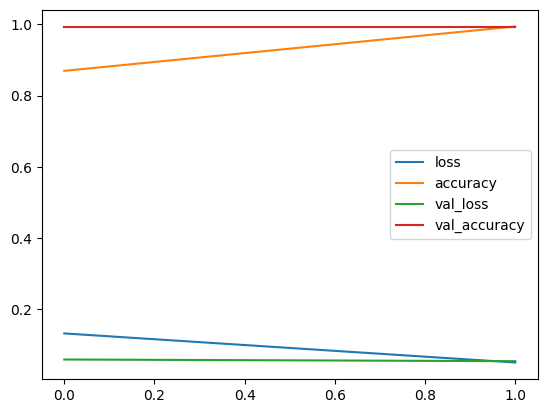

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history_0.history).plot()
plt.show()

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


In [ ]:

from ipywidgets import interact,Textarea
import numpy as np

def predict(text):
    """
    This function predicts the toxicity of the comment passed.
    """
    predictions = model_0.predict([text])
    result = str({column_name: prediction for column_name, prediction in zip(df.columns[2:], np.squeeze(predictions))})
    output_string = f"Prediction for '{text}' ===> Results: {result}"
    return output_string

interact(predict, text=Textarea(value='', placeholder='Type your text here', description='Text:'))

interactive(children=(Textarea(value='', description='Text:', placeholder='Type your text here'), Output()), _…

<function __main__.predict(text)>